In [3]:
import geopandas as gpd
import pandas as pd
import contextily as cx
import matplotlib.pyplot as plt
import shapely as shp
from shapely import wkt
import numpy as np

# Main-Sawansea

In [159]:
main_swansea = gpd.read_file("/home/lohitd@nextbillion.ai/Downloads/Abertawe_-_Swansea-20211111T055410Z-001/Abertawe_-_Swansea/Land_Registry_Cadastral_Parcels.gml")

In [169]:
main_swansea.head(3)

,gml_id,INSPIREID,LABEL,NATIONALCADASTRALREFERENCE,VALIDFROM,BEGINLIFESPANVERSION,geometry,area,coordinates,geometry_cordinate_count
0,PREDEFINED.fid-5a335a4d_17cf8419bf4_-8000,15728391,15728391,15728391,2009-01-27T11:19:03.156Z,2009-01-27T11:19:03.156Z,"POLYGON ((272523.226 198702.392, 272524.808 19...",186188.099411,"[(272523.226, 198702.392), (272524.808, 198703...",190
1,PREDEFINED.fid-5a335a4d_17cf8419bf4_-7fff,15729073,15729073,15729073,2009-01-27T08:42:38.987Z,2009-01-27T08:42:38.987Z,"POLYGON ((272350.400 199615.200, 272349.500 19...",221269.126350,"[(272350.4, 199615.2), (272349.5, 199608.5), (...",102
2,PREDEFINED.fid-5a335a4d_17cf8419bf4_-7ffe,15724523,15724523,15724523,2009-01-26T16:36:42.017Z,2009-01-26T16:36:42.017Z,"POLYGON ((272000.000 199035.600, 272014.100 19...",53252.911390,"[(272000.0, 199035.6), (272014.1, 199035.6), (...",43


In [ ]:
df1 = pd.DataFrame(gdf)

# Area

In [163]:
main_swansea['area'] = main_swansea['geometry'].area

In [ ]:
gdf['area_sqkm'] = gdf['geometry'].area/10**6

gdf['area_sqfeet'] = gdf['area_sqkm']/0.00000009290304

gdf['area_sqmeter'] = gdf['area_sqkm'] * 1000000

# Cordinates

In [165]:
def coord_lister(geom):
    coords = list(geom.exterior.coords)
    return (coords)

coordinates = main_swansea.geometry.apply(coord_lister)

coordinates

main_swansea['coordinates'] = pd.Series(coordinates)

# no_of_cordinates_count

In [167]:
list0 = []

for index, row in main_swansea.iterrows():
    list0.append(len(row['coordinates']))

main_swansea['geometry_cordinate_count'] = pd.Series(list0)

# main_plot

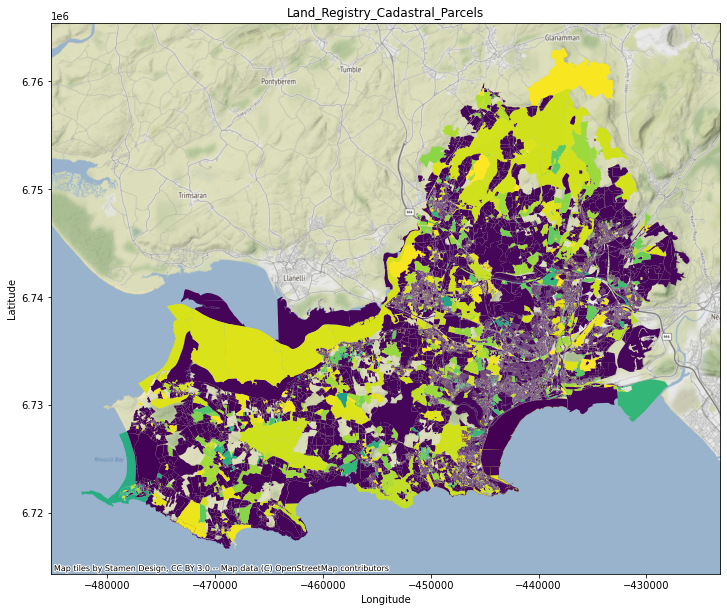

In [16]:
main_swansea_crs = main_swansea.to_crs(epsg=3857)
ax = main_swansea_crs.plot(markersize = 1 , column = 'LABEL' ,figsize=(12,12))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Land_Registry_Cadastral_Parcels')
cx.add_basemap(ax)
plt.show()

# drop_multiple_cordinates_columns_unrequired_data

In [ ]:
gdf.drop(columns=['coordinates'], inplace = True)

# print_to_file

In [ ]:
gdf_crs_4326 = gdf.to_crs(epsg=4326)
gdf_crs_4326.to_file('/home/lohitd@nextbillion.ai/Downloads/Abertawe_-_Swansea/Land_Registry_Cadastral_Parcels4326.geojson', driver = 'GeoJSON')

In [ ]:
df1.to_csv("/home/lohitd@nextbillion.ai/Downloads/Abertawe_-_Swansea/Land_Registry_Cadastral_Parcels.csv")

# cordinates_count_lessthan_20

In [27]:
cr_less_20 = main_swansea[main_swansea['geometry_cordinate_count']<20]

In [183]:
cr_less_20.head(3)

,gml_id,INSPIREID,LABEL,NATIONALCADASTRALREFERENCE,VALIDFROM,BEGINLIFESPANVERSION,geometry,area,coordinates,geometry_cordinate_count
3,PREDEFINED.fid-5a335a4d_17cf8419bf4_-7ffd,15710096,15710096,15710096,2009-01-27T14:16:53.250Z,2009-01-27T14:16:53.250Z,"POLYGON ((271092.250 197905.350, 271090.950 19...",138.661791,"[(271092.25, 197905.35), (271090.95, 197904.15...",15
4,PREDEFINED.fid-5a335a4d_17cf8419bf4_-7ffc,60202188,60202188,60202188,2019-04-02T23:00:00Z,2019-04-03T14:07:40.676Z,"POLYGON ((271083.470 197892.090, 271084.200 19...",143.409625,"[(271083.47, 197892.09), (271084.2, 197891.7),...",15
7,PREDEFINED.fid-5a335a4d_17cf8419bf4_-7ff9,61248975,61248975,61248975,2020-12-18T00:00:00Z,2020-12-18T11:06:27.521Z,"POLYGON ((271102.600 197877.800, 271102.730 19...",270.482637,"[(271102.6, 197877.8), (271102.73, 197876.5), ...",17


In [ ]:
def coord_lister(geom):
    coords = list(geom.exterior.coords)
    return (coords)

coordinates = cr_less_20.geometry.apply(coord_lister)

cr_less_20['coordinates'] = pd.Series(coordinates)

In [ ]:
list0 = []

for index, row in cr_less_20.iterrows():
    list0.append(len(row['coordinates']))

cr_less_20['geometry_cordinate_count'] = pd.Series(list0)

In [ ]:
cr_less_20_g3000 = cr_less_20[cr_less_20['area']>20000]

In [ ]:
gdf_area_vc<20000

In [ ]:
cr_less_20_g3000.drop(columns='coordinates', inplace= True)

cr_less_20_g3000.to_file('/home/lohitd@nextbillion.ai/Downloads/Abertawe_-_Swansea/cr_less_20_g3000.geojson', driver = 'GeoJSON')

# centroids

In [30]:
centroids = main_swansea['geometry'].representative_point()

In [31]:
centroids_gdf = gpd.GeoDataFrame(centroids)

In [32]:
centroids_gdf.rename(columns = {0:'geometry'}, inplace = True)

In [33]:
centroids_gdf['gml_id'] = main_swansea['gml_id']
centroids_gdf['INSPIREID'] = main_swansea['INSPIREID']
centroids_gdf['LABEL'] = main_swansea['LABEL']

In [34]:
centroids_gdf

,geometry,gml_id,INSPIREID,LABEL
0,POINT (272278.377 198766.129),PREDEFINED.fid-5a335a4d_17cf8419bf4_-8000,15728391,15728391
1,POINT (272443.508 199336.905),PREDEFINED.fid-5a335a4d_17cf8419bf4_-7fff,15729073,15729073
2,POINT (272089.386 199203.205),PREDEFINED.fid-5a335a4d_17cf8419bf4_-7ffe,15724523,15724523
3,POINT (271096.120 197906.350),PREDEFINED.fid-5a335a4d_17cf8419bf4_-7ffd,15710096,15710096
4,POINT (271097.582 197902.250),PREDEFINED.fid-5a335a4d_17cf8419bf4_-7ffc,60202188,60202188
...,...,...,...,...
101387,POINT (258829.573 201030.270),PREDEFINED.fid-5a335a4d_17cf84210a0_-20b2,15554194,15554194
101388,POINT (258774.216 201099.370),PREDEFINED.fid-5a335a4d_17cf84210a0_-20b0,15552819,15552819
101389,POINT (258767.254 201117.822),PREDEFINED.fid-5a335a4d_17cf84210a0_-20af,15552612,15552612
101390,POINT (258745.014 201190.288),PREDEFINED.fid-5a335a4d_17cf84210a0_-20ad,60128681,60128681


In [ ]:
cr_less_20_g3000_crs = cr_less_20_g3000.to_crs(epsg=3857)
ax = cr_less_20_g3000_crs.plot(markersize = 1 , column = 'LABEL' ,figsize=(12,12))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Land_Registry_Cadastral_Parcels')
cx.add_basemap(ax)
plt.show()

# extra

In [ ]:
centroids_within_gdf = gpd.sjoin(cr_less_20,centroids_gdf, how="inner", op='intersects')

In [ ]:
centroids_within_gdf.to_file('/home/lohitd@nextbillion.ai/Downloads/Abertawe_-_Swansea/centroids.geojson', driver = 'GeoJSON')

In [ ]:
centroids_gdf.to_file('/home/lohitd@nextbillion.ai/Downloads/Abertawe_-_Swansea/onlycentroids.geojson', driver = 'GeoJSON')

# value_counts

In [ ]:
gdf_area_vc = gdf[['gml_id','area','geometry_cordinate_count']].value_counts()

In [ ]:
cr_les_20_csv = cr_les_20['area'].value_counts()

In [ ]:
gdf_area_vc

In [ ]:
cr_less_20_vc.to_csv('/home/lohitd@nextbillion.ai/Downloads/Abertawe_-_Swansea/cr_less_20_vc.csv')
gdf_area_vc.to_csv('/home/lohitd@nextbillion.ai/Downloads/Abertawe_-_Swansea/gdf_area_vc.csv')

In [ ]:
centroids_within_gdf.drop(columns= 'coordinates')

In [ ]:
centroids_within_gdf.to_file('/home/lohitd@nextbillion.ai/Downloads/Abertawe_-_Swansea/centroids.geojson', driver = 'GeoJSON')

# API Response capture

In [47]:
import requests
import json

# Input

In [171]:
api_input = pd.read_csv('/home/lohitd@nextbillion.ai/Downloads/coordinates.csv')

In [186]:
api_input.head(1)

,origin,destination,origin_lat,origin_lon,destination_lat,destination_lon,nb_request_links,nb_response_dict,nb_distance,nb_duration,tomtom_request_links,tomtom_response_dict
0,"-36.86671622734623, 174.74985089032887","-37.68512409733674, 176.13186684906205",-36.86671622734623,174.74985089032887,-37.68512409733674,176.13186684906205,https://api.nextbillion.io/directions/json?ori...,"{'status': 'Ok', 'routes': [{'geometry': '~p_`...",213720.4,9686.7,https://api.tomtom.com/routing/1/calculateRout...,"{'formatVersion': '0.0.12', 'routes': [{'summa..."


In [178]:
api_input.loc[0,'nb_request_links']

'https://api.nextbillion.io/directions/json?origin=-36.86671622734623,174.74985089032887&destination=-37.68512409733674,176.13186684906205&key=45bea3792b6e46c1a705f3a8bc3eb33a'

# lat/lng split

In [173]:
# Create two lists for the loop results to be placed
origin_lat = []
origin_lon = []
destination_lat = []
destination_lon = []

# For each row in a varible,
for index, row in df.iterrows():
    origin_lat.append(row['origin'].split(', ')[0])
    origin_lon.append(row['origin'].split(', ')[1])
    destination_lat.append(row['destination'].split(', ')[0])
    destination_lon.append(row['destination'].split(', ')[1])
        
api_input['origin_lat'] = origin_lat
api_input['origin_lon'] = origin_lon
api_input['destination_lat'] = destination_lat
api_input['destination_lon'] = destination_lon

# nb_request_links

In [182]:
nb_request = []

for index, row in api_input.iterrows():
    nb_request.append(f"https://api.nextbillion.io/directions/json?origin={row['origin_lat']},{row['origin_lon']}&destination={row['destination_lat']},{row['destination_lon']}&key=45bea3792b6e46c1a705f3a8bc3eb33a")
    
api_input['nb_request_links'] = nb_request

# nb_responses

In [179]:
nb_request_links = api_input['nb_request_links']

nb_response_dict_list = []

for link in nb_request_links:
    nb_response = requests.get(link)
    nb_response_dict_list.append(dict(json.loads(nb_response.text)))
    
api_input['nb_response_dict'] = pd.Series(nb_response_dict_list)

# nb_distance&duration

In [180]:
nb_distance = []
nb_duration = []

for index, row in api_input.iterrows():
    nb_response = dict(row['nb_response_dict'])
    nb_response_routes = nb_response['routes']
    nb_distance.append(nb_response_routes[0]['distance'])
    nb_duration.append(nb_response_routes[0]['duration'])
    
api_input['nb_distance'] = pd.Series(nb_distance)
api_input['nb_duration'] = pd.Series(nb_duration)

# tomtom_request_links

In [184]:
tomtom_request = []

for index, row in api_input.iterrows():
    tomtom_request.append(f"https://api.tomtom.com/routing/1/calculateRoute/{row['origin_lat']},{row['origin_lon']}:{row['destination_lat']},{row['destination_lon']}/json?key=T4NeSzdsHG07NmEA7AvH2Jv2IL1s3qUp&travelMode=car")
    
api_input['tomtom_request_links'] = tomtom_request

# tomtom_responses_links

In [185]:
tomtom_request_links = api_input['tomtom_request_links']

tomtom_response_dict_list = []

for link in tomtom_request_links:
    tomtom_response = requests.get(link)
    tomtom_response_dict_list.append(dict(json.loads(tomtom_response.text)))
    
api_input['tomtom_response_dict'] = pd.Series(tomtom_response_dict_list)

# tomtom_distance&duration

# mapbox_request_links

In [ ]:
nb_request = []

for index, row in df.iterrows():
    nb_request.append(f"https://api.nextbillion.io/directions/json?origin={row['origin_lat']},{row['origin_lon']}&destination={row['destination_lat']},{row['destination_lon']}&key=45bea3792b6e46c1a705f3a8bc3eb33a")
    
api_input['nb_request_links'] = nb_request

# mapbox_responses_links

In [ ]:
nb_request_links = api_input['nb_request_links']

nb_response_dict_list = []

for link in nb_request_links:
    nb_response = requests.get(link)
    nb_response_dict_list.append(dict(json.loads(nb_response.text)))
    
api_input['nb_response_dict'] = pd.Series(nb_response_dict_list)

# mapbox_distance&duration

# google_request_links

In [ ]:
nb_request = []

for index, row in df.iterrows():
    nb_request.append(f"https://api.nextbillion.io/directions/json?origin={row['origin_lat']},{row['origin_lon']}&destination={row['destination_lat']},{row['destination_lon']}&key=45bea3792b6e46c1a705f3a8bc3eb33a")
    
api_input['nb_request_links'] = nb_request

# google_responses_links

In [ ]:
nb_request_links = api_input['nb_request_links']

nb_response_dict_list = []

for link in nb_request_links:
    nb_response = requests.get(link)
    nb_response_dict_list.append(dict(json.loads(nb_response.text)))
    
api_input['nb_response_dict'] = pd.Series(nb_response_dict_list)

# google_distance&duration

# google_startaddress&endaddress